In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('game data.csv - game data.csv.csv')

In [3]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df.drop('Days',axis = 1, inplace=True)

In [5]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [6]:
x = df.iloc[:,:-1]

In [7]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [31]:
y = df.iloc[:,3]

In [32]:
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [10]:
#x = df.drop('Wear Jacket?',axis=1)

In [11]:
#y = df['Wear Jacket?']

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
x = x.apply(le.fit_transform)

In [15]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [16]:
x.Outlook = le.fit_transform(x['Outlook'])

In [17]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [18]:
x.Temprature = le.fit_transform(x['Temprature'])
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [19]:
x.Routine = le.fit_transform(x['Routine'])
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [20]:
from pandas.core.dtypes.common import is_numeric_dtype

In [21]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
        x[col]=le.fit_transform(x[col])

In [22]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(x,y)

DecisionTreeClassifier()

In [26]:
clf.predict([[1,0,0]])

array(['Indoor'], dtype=object)

In [27]:
clf.predict([[1,0,1]])

array(['Outdoor'], dtype=object)

In [28]:
clf.predict([[1,1,0]])

array(['Indoor'], dtype=object)

In [29]:
from sklearn import tree

[Text(279.0, 407.70000000000005, 'Routine <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

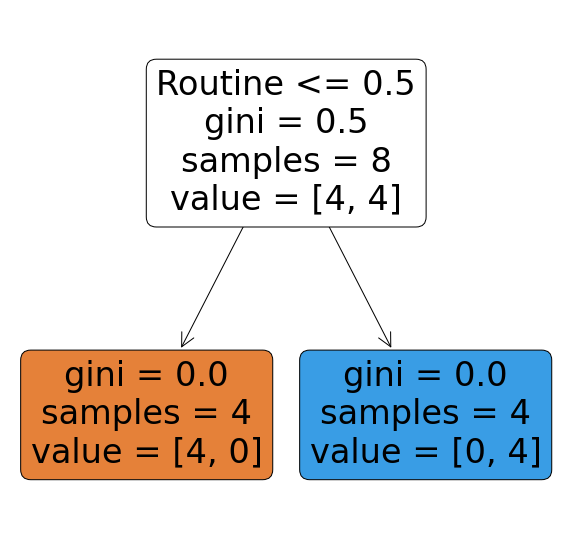

In [33]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names=x.columns, rounded=True,filled=True)